# Content and Objective

+ Show result of "taxi problem":
    + Given $\Omega=\{1,...,K\}$ 
    + Observe $K$ samples $X_1=x_1, ..., X_N=x_N$ (assumed to be different)
    + Estimate for $K$ based on the samples: $$\hat{K}=S(x_1,...,x_N)$$
    
+ Method: Sample groups and get estimator

In [1]:
# importing
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 30}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(30, 15) )

# Parameters

In [3]:
# define (unknown) group size
K = 1000 #np.random.randint( 1000 )

taxis = [ t for t in range( K ) ]

# size of subgroup to be observed
M = K // 10

# number of observations
N_obser = int( 1e3 )

# allowing for multiple observations (Modus Operandi: same number twice)?
MO = 0

# Sample distances used in order statistics for doing quantils
Q = 10

# Observe and Estimate Using Max-Estimator

+ First using $\hat{K}=\max\{x_1,..., x_N\}$, equalling ML estimation since:
$$
P(X_1=x_1,\ldots, X_N=x_N|K)
=
\prod\limits_{i=1}^N P(X_i=x_i|K)
=
\begin{cases}
\left( \frac{1}{K}\right)^N , & x_1\leq K, \ldots, x_N\leq K
\\
0, & \text{ otherwise}
\end{cases}
.
$$
Thus, prob. is maximized if $K$ is chosen to be as small as possible, corresponding to the largest $x_i$
+ Show true group size and sample mean of estimation 

In [4]:
# initialize array for collecting several estimations to evaluate bias of estimator
estimators = np.zeros( N_obser )

for _k in range( N_obser ):        
    
    sample = np.random.choice( taxis, replace = MO )
    
    estimators[ _k ] = np.max( sample )
    
# get sample average and compare to true value
print('True value: {}'.format( K ) )
print('Average estimate: {}'.format( np.average( estimators ) ) )

True value: 1000
Average estimate: 472.056


# Show Results for Additional Estimators

+ Additional esimators
    + $\hat{K}=\max\{x_1,...,x_N\}+\min\{x_1,...,x_N\}$
    + $\hat{K}=2\cdot \frac{1}{N}( x_1+ \cdots+ x_N)$


In [5]:
# define range of group size to be analyzed
group_sizes = range( 1, K//10, 5 )

# initialize arrays for collecting estimator values
est_max = np.zeros_like( group_sizes )
est_maxmin = np.zeros_like( group_sizes )
#est_quantiles = np.zeros_like( group_sizes )
est_avg = np.zeros_like( group_sizes )


# loop for group sizes
for ind_gs, val_gs in enumerate( group_sizes ):
    
    # initialize array for collecting several estimations to evaluate bias of estimator
    estimators_max = np.zeros( N_obser )
    estimators_maxmin = np.zeros( N_obser )
    estimators_avg = np.zeros( N_obser )
    #estimators_quantiles = np.zeros( N_obser )
    
    # loop for realizations
    for _k in range( N_obser ):        

        # sample and get estimator
        sample = np.random.choice( taxis, size = val_gs,  replace = MO )
        
        estimators_max[ _k ] = np.max( sample )
        estimators_maxmin[ _k ] = np.max( sample ) + np.min( sample )
        
        #estimators_quantiles[ _k ] = np.sort( sample )[ -Q ] + np.sort( sample )[ Q ]
        estimators_avg[ _k ] = 2 * np.average( sample )

    # find average value of estimation for given group size
    est_max[ ind_gs ] = np.average( estimators_max )
    est_maxmin[ ind_gs ] = np.average( estimators_maxmin )
    est_avg[ ind_gs ] = np.average( estimators_avg )
    #est_quantiles[ ind_gs ] = np.average( estimators_quantiles )

In [6]:
plt.figure()


plt.plot( group_sizes, est_max, label='$\hat{E}( \\max(X_1,\ldots,X_N) )$' ) 
plt.plot( group_sizes, est_maxmin, label='$\hat{E}( \\max(X_1,\ldots,X_N) + \\min(X_1,\ldots,X_N)  )$' ) 
plt.plot( group_sizes, est_avg, label='$\hat{E}( \\frac{1}{N}\sum_{i=1}^N X_i)$' ) 
#plt.plot( group_sizes, est_quantiles, label='$\hat{E}( X_{(Q)} + X_{(K-Q)}  )$' ) 


plt.grid(True)
plt.legend( loc='best' )
plt.title('K = {}'.format(K) )
plt.xlabel('$N$')

Text(0.5, 0, '$N$')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x119bcda60> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 3000x1500 with 1 Axes>

Text(0.5, 0, '$N$')

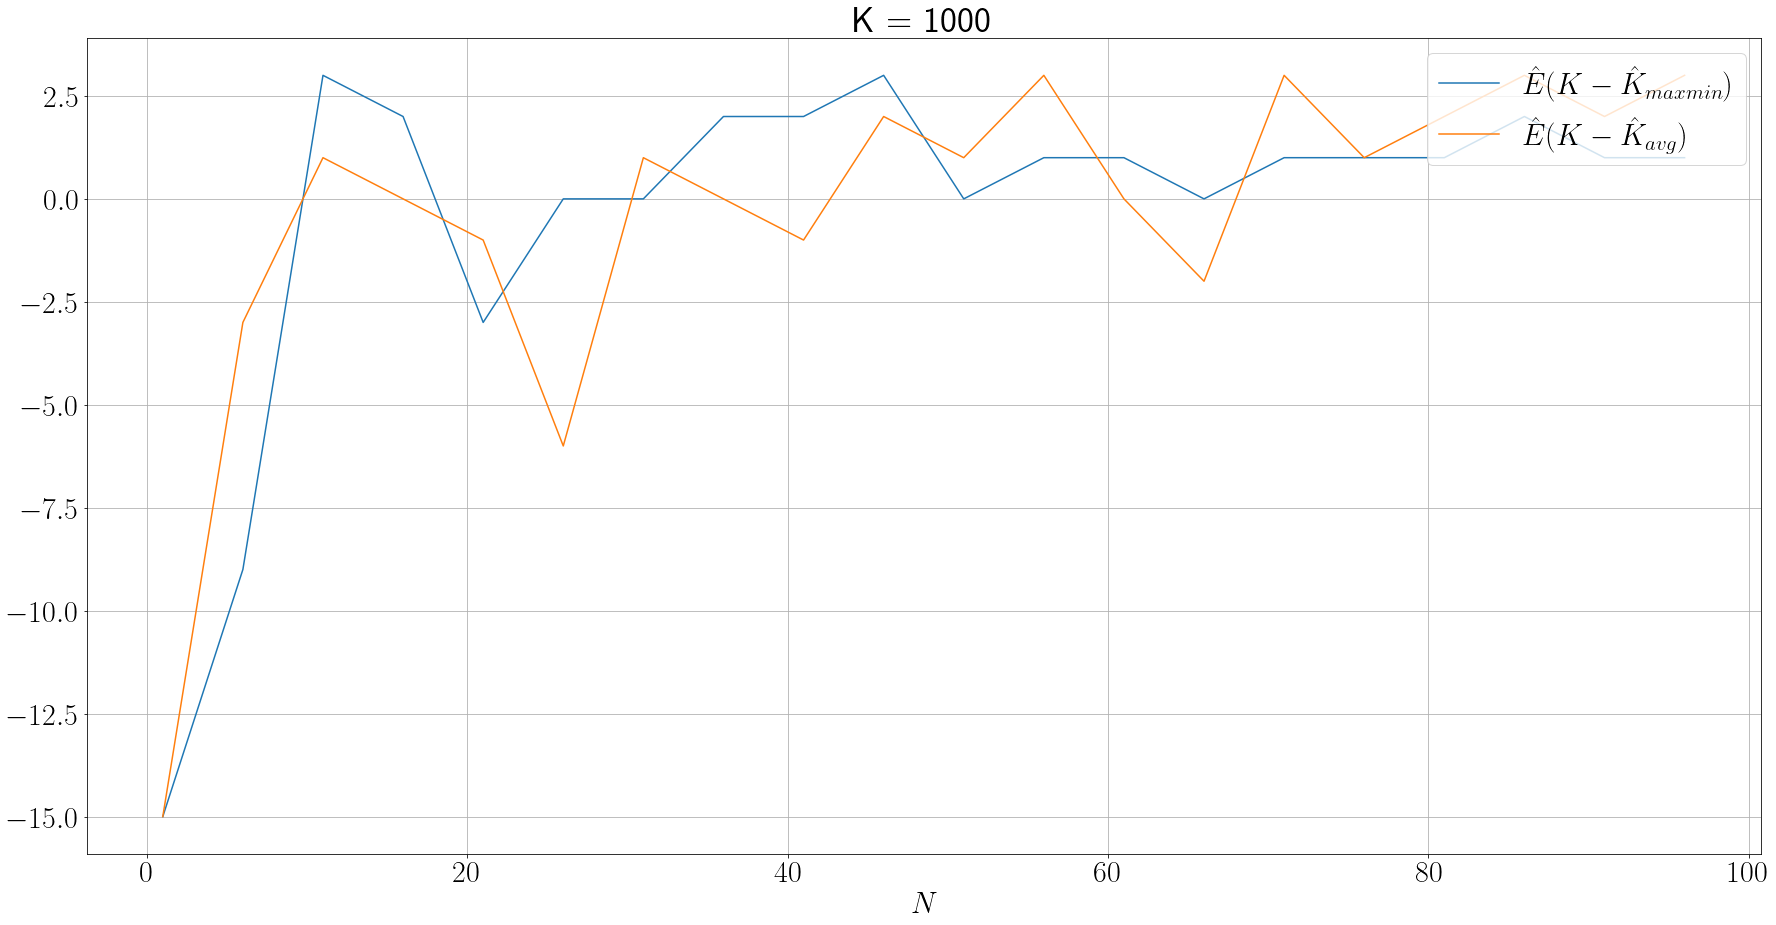

In [ ]:
plt.figure()

#plt.plot( group_sizes, 20*np.log10( np.abs( est_maxmin - N ) ), label='$\hat{E}( |\hat{N}_{maxmin} - N| )$ (dB)' ) 
plt.plot( group_sizes, K - est_maxmin, label='$\hat{E}( K-\hat{K}_{maxmin} )$' ) 
plt.plot( group_sizes, K - est_avg, label='$\hat{E}( K-\hat{K}_{avg} )$' ) 
#plt.plot( group_sizes, N - est_quantiles, label='$\hat{E}( N-\hat{N}_{quant} )$' ) 


plt.grid(True)
plt.legend( loc='upper right' )
plt.title('K = {}'.format(K) )
plt.xlabel('$N$')